## Στοιχεία Ομάδας

Αριθμός Ομάδας: F05

    > Καρυπιάδης Ευστράτιος: 03114911
    > Σταματελόπουλος Νικόλαος: 03116138

---

## Reading, Resizing and Combining

Θα ξεκινήσπυμε διαβάζοντας τις εικόνες προσώπων, κάθε μία από τις οποίες θα προσαρμόσουμε σε διαστάσεις `(512, 256)` με χρήση της συνάρτησης `resize`. Καταλήξαμε στις συγκεκριμένες διαστάσεις με σκοπό να μην αλλοιώσουμε τη γεωμετρία των προσώπων, έτσι ώστε να καταλήξουμε σε ένα αισθητικά ευχάριστο αποτέλεσμα cartoonification.
 
Στη συνέχεια θα τις συνθέσουμε σε μία κοινή εικόνα με βοήθεια της συνάρτησης `numpy.concatenate`.

In [0]:
import skimage
import numpy as np
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt
from skimage import img_as_float, img_as_ubyte

# Reading image files
face_image1 = img_as_float(io.imread('1.jpg'))
face_image2 = img_as_float(io.imread('2.jpg'))

# # Rescaling to desired dimensions
face_image1_resized = resize(face_image1, (512, 256), anti_aliasing=True)
face_image2_resized = resize(face_image2, (512, 256), anti_aliasing=True)

# Concatinating horizontally to one image
final_image = np.concatenate((face_image1_resized, face_image2_resized), axis=1)

---

## Color Space

Για χρωματικό χώρο επίλεγουμε τον [HSV](https://bit.ly/2Auy7Ml). Η επιλογή μας βασίζεται κυρίως σε επιστημονικές [δημοσιεύσεις](https://bit.ly/3dOLUMc), οι οποίες καταλήγουν ότι ο συγκεκριμένος χρωματικός χώρος είναι ιδανικός για την ανίχνευση ακμών σε έγχρωμες εικόνες. Η λογική είναι ότι θα χρησιμοποιήσουμε και τις τρεις διαστάσεις του χώρου, για να ανιχνεύσουμε χρήσιμες ακμές που εξυπηρετούν την εφαρμογή μας.

Αξίζει να παρατηρήσουμε ότι η τρίτη διάσταση, *Value*, του συγκεκριμένου χώρου θα μπορούσε να θεωρηθεί ισοδύναμη με την εικόνα μας σε ασπρόμαυρες αποχρώσεις, μία μορφή που ενδείκνυται για ανίχνευση ακμών. 

In [0]:
from skimage import color

# Selecting HSV color space
final_image_hsv = color.rgb2hsv(final_image)

---

## Adding Noise

Θα προσθέσουμε δύο ειδών θορύβου στην εικόνα μας, για να παράξουμε δύο νέες εικόνες, στις οποίες θα βασιστούμε για τη συνέχεια της άσκησης. Πιο συγκεκριμένα, θα προσθέσουμε Gaussian και Salt & Pepper θόρυβο.

In [0]:
from skimage.util import random_noise

def snpAmount(digit):
  return 1/90*digit + 0.3 

# Adding noise
gaussian_image = random_noise(final_image_hsv, mode='gaussian', seed=8) # selecting 8 from 03116138
saltpepper_image = random_noise(final_image_hsv, mode='s&p', seed=42, amount=snpAmount(8)) # selecting 8 from 03116138

---

## Filtering

Για αποθορυβοποίηση των εικόνων μας θα δοκιμάσουμε τρία διαφορετικά φίλτρα: Mean, Gaussian και Median. Επειδή οι εικόνες με τις οποίες δουλεύουμε είναι 3 διαστάσεων, σημειώνουμε ότι η αποθορυβοποίηση λαμβάνει χώρα και στα 3 κανάλια της εικόνας, τα εκάστοτε αποτελέσματα της οποίας συνθέτουμε σε μία τελική εικόνα με χρήση της συνάρτησης `numpy.dstack`. 

Για οπτικοποίηση των αποτελεσμάτων μας υλοποιούμε τη συνάρτηση `imcmp`, η οποία έχει ως στόχο να συγκρίνει, τουλάχιστον οπτικά, την αποδοτικότητα των φίλτρων που θα δοκιμάσουμε.

In [0]:
def imcmp_v2(image_set, title_set, cmap=None):
  """ Plot 2 images at a time. """
  fig, axes = plt.subplots(1, 2, figsize=(10, 8))
  for ax in axes:
    ax.axis('off') # discard axes
  
  (ax_1, ax_2) = axes

  if cmap:
    ax_1.imshow(image_set[0], cmap=cmap)
    ax_2.imshow(image_set[1], cmap=cmap)
  else:
    # Convert from HSV to RBG before plotting
    ax_1.imshow(color.hsv2rgb(image_set[0]))
    ax_2.imshow(color.hsv2rgb(image_set[1]))

  # Set titles
  ax_1.set_title(title_set[0])
  ax_2.set_title(title_set[1])

def imcmp_v5(image_set, title_set, cmap=None):
  """ Plot 5 images at a time. """
  fig, axes = plt.subplots(1, 5, figsize=(24, 12))
  for ax in axes:
    ax.axis('off') # discard axes
  
  (ax_1, ax_2, ax_3, ax_4, ax_5) = axes

  if cmap:
    ax_1.imshow(image_set[0], cmap=cmap)
    ax_2.imshow(image_set[1], cmap=cmap)
    ax_3.imshow(image_set[2], cmap=cmap)
    ax_4.imshow(image_set[3], cmap=cmap)
    ax_5.imshow(image_set[4], cmap=cmap)
  else:
    # Convert from HSV to RBG before plotting
    ax_1.imshow(color.hsv2rgb(image_set[0]))
    ax_2.imshow(color.hsv2rgb(image_set[1]))
    ax_3.imshow(color.hsv2rgb(image_set[2]))
    ax_4.imshow(color.hsv2rgb(image_set[3]))
    ax_5.imshow(color.hsv2rgb(image_set[4]))

  # Set titles
  ax_1.set_title(title_set[0])
  ax_2.set_title(title_set[1])
  ax_3.set_title(title_set[2])
  ax_4.set_title(title_set[3])
  ax_5.set_title(title_set[4])

Στη συνέχεια ακολουθούν δοκιμές των παραπάνω φίλτρων μεταβάλλοντας τις αντίστοιχες εκάστοτε παραμέτρους.

In [0]:
from scipy import ndimage
from skimage import filters
from skimage.morphology import disk

### Gaussian Noise Image

#### Mean filter

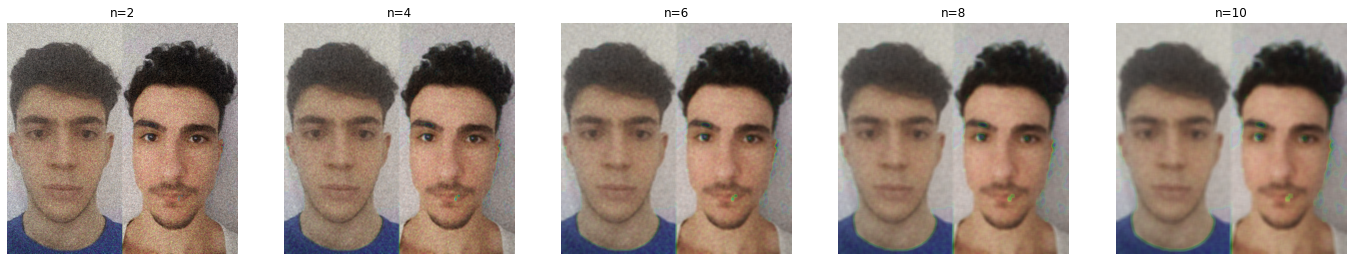

In [6]:
acc = []
for n in [2, 4, 6, 8, 10]:
  mean_kernel = np.full((n, n), 1/(n*n))
  mean_filteredH = ndimage.convolve(gaussian_image[:, :, 0], mean_kernel) # filtering dimension H
  mean_filteredS = ndimage.convolve(gaussian_image[:, :, 1], mean_kernel) # filtering dimension S
  mean_filteredV = ndimage.convolve(gaussian_image[:, :, 2], mean_kernel) # filtering dimension V
  mean_filtered_gaussian = np.dstack((mean_filteredH, mean_filteredS, mean_filteredV)) # combine filtered dimensions to HSV result
  acc.append(mean_filtered_gaussian)

imcmp_v5(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'])

Παρατηρώντας τα παραπάνω αποτελέσματα, μπορούμε να καταλήξουμε ότι σε καμία από τις περιπτώσεις που εξετάσαμε δεν έχουμε ικανοποιητική απομάκρυνση θορύβου. Εκτός αυτού, αξίζει να παρατηρήσουμε ότι όσο αυξάνουμε το μέγεθος του φίλτρου που συνελίσσεται με την εικόνα μας μειώνεται και η ποιότητα του εξαγόμενης εικόνας, η οποία χαρακτηρίζεται από χρωματικά artifacts και θολές περιοχές. 

#### Gaussian filter

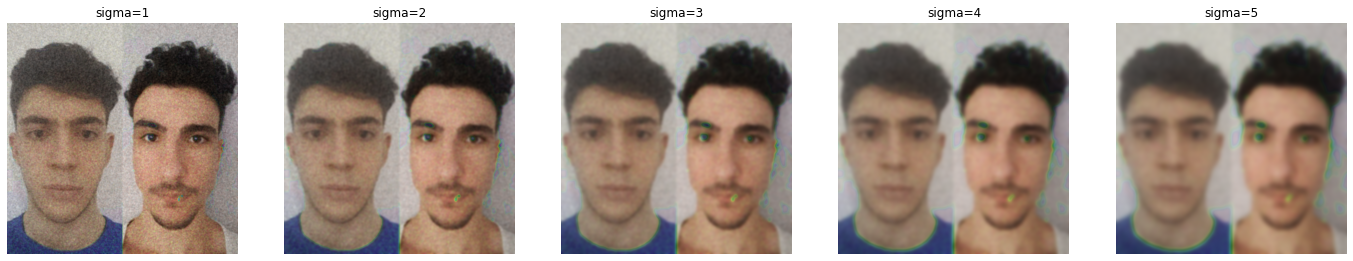

In [7]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  gaus_filteredH = filters.gaussian(gaussian_image[:, :, 0], sigma) # filtering dimension H
  gaus_filteredS = filters.gaussian(gaussian_image[:, :, 1], sigma) # filtering dimension S
  gaus_filteredV = filters.gaussian(gaussian_image[:, :, 2], sigma) # filtering dimension V
  gaus_filtered_gaussian = np.dstack((gaus_filteredH, gaus_filteredS, gaus_filteredV)) # combine filtered dimensions to HSV result
  acc.append(gaus_filtered_gaussian)

imcmp_v5(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'])

Στην περίπτωση του Γκαουσιανού φίλτρου, ενώ έχουμε σχετικά θολό αποτέλεσμα εξόδου, παρατηρούμε ότι η απομάκρυνση του θορύβου είναι αποδοτική. Συγκεκριμένα, για `sigma=2`, έχουμε ένα ικανοποιητικό αποτέλεσμα.

Παρατηρούμε ωστόσο ότι στην εικόνα μας περιέχονται χρωματικά artifacts. Για να ξεπεράσουμε το συγκεκριμένο πρόβλημα, μπορούμε να εκμεταλλευτούμε μόνο τη διάσταση V, της εικόνας, η οποία, όπως αναφέραμε και παραπάνω, συνάδει με `grayscale` χρωματικό χώρο. Παρακάτω παρουσιάζουμε τα αντίστοιχα αποτελέσματα:

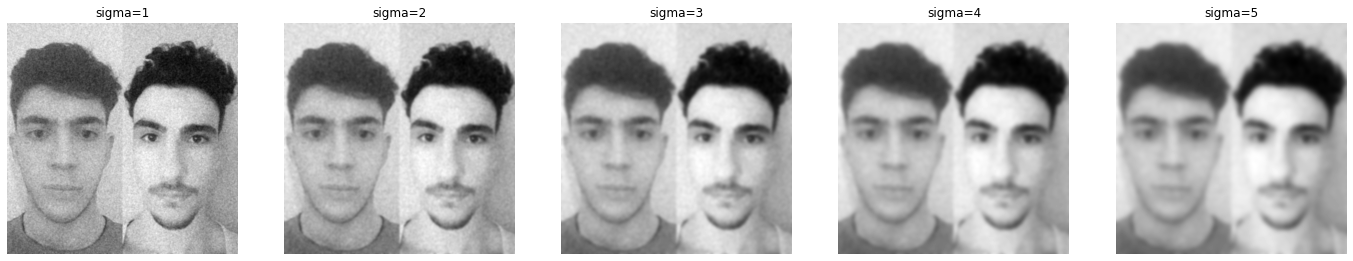

In [8]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  gaus_filteredV = filters.gaussian(gaussian_image[:, :, 2], sigma) # filtering dimension V
  acc.append(gaus_filteredV)

imcmp_v5(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'], cmap='gray')

#### Median filter

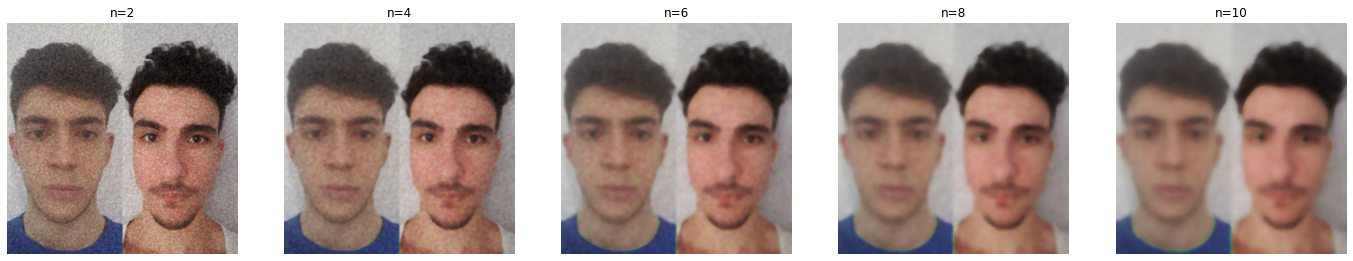

In [9]:
acc = []
for n in [2, 4, 6, 8, 10]:
  neighborhood = disk(n)
  median_filteredH = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 0]), neighborhood) # filtering dimension H
  median_filteredS = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 1]), neighborhood) # filtering dimension S
  median_filteredV = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 2]), neighborhood) # filtering dimension V
  median_filtered_gaussian = img_as_float(np.dstack((median_filteredH, median_filteredS, median_filteredV))) # combine filtered dimensions to HSV result
  acc.append(median_filtered_gaussian)

imcmp_v5(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'])

Το φίλτρο μέσου όρου θα μπορούσαμε να πούμε ότι παρουσιάζει παρόμοια συμπεριφορά και αποτελέσματα με εκείνα του Γκαουσιανού. Πιο συγκεκριμένα, για δίσκο ακτίνας 6 η απομάκρυνση θορύβου είναι ικανοποιητική, εάν εξαιρέσουμε και πάλι τα artifacts που προκύπτουν.

Προς σύγκριση των δύο φίλτρων θα παράξουμε και εδώ τη συμπεριφορά του φίλτρου μόνο στη διάσταση V του χώρου HSV:

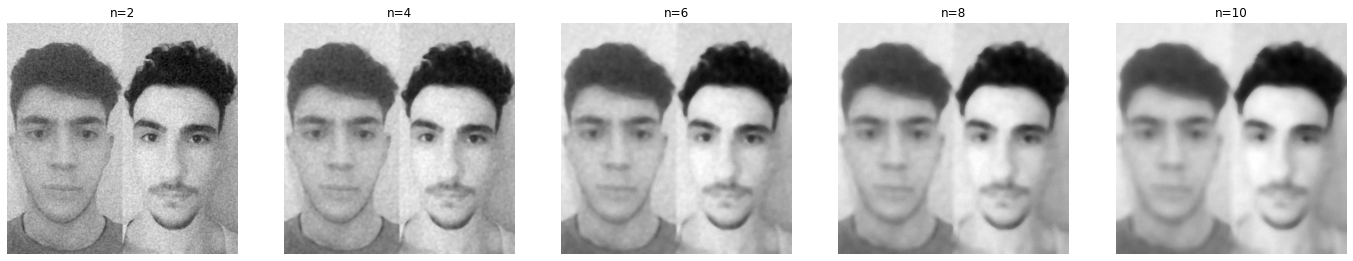

In [10]:
acc =[]
for n in [2, 4, 6, 8, 10]:
  neighborhood = disk(n)
  median_filteredV = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 2]), neighborhood) # filtering dimension V
  acc.append(median_filteredV)

imcmp_v5(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'], cmap='gray')

Λαμβάνοντας όλα τα παραπάνω υπόψιν, το φίλτρο το οποίο επιλέγουμε να χρησιμοποιήσουμε για αποθορυβοποίηση του Γκαουσιανού θορύβου είναι το **Γκαουσιανό φίλτρο** για `sigma=2`. Σημειώνουμε ότι κατά την αποθορυβοποίηση χρησιμοποιήσαμε **μόνο** τη διάσταση V της εικόνας εισόδου μας που σημαίνει ότι στη συνέχεια της άσκησης θα δουλέψουμε μόνο στη συγκεκριμένη διάσταση.

Σημειώνουμε, τέλος, ότι κατά την παραπάνω διαδικασία θυσιάσαμε μέρος της ποιότητας της εικόνας, για απομάκρυνση του θορύβου.

In [0]:
gaussian_final = filters.gaussian(gaussian_image[:, :, 2], sigma=2) # final gaussian-noise image

### Salt & Pepper Noise Image

#### Mean filter

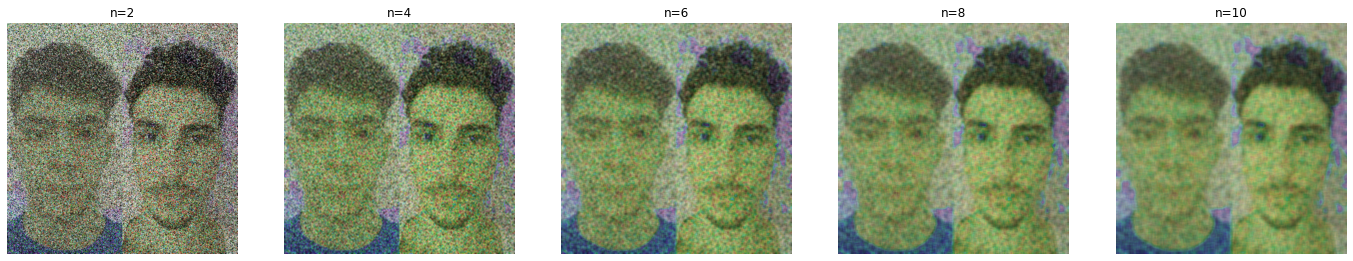

In [12]:
acc = []
for n in [2, 4, 6, 8, 10]:
  mean_kernel = np.full((n, n), 1/(n*n))
  mean_filteredH = ndimage.convolve(saltpepper_image[:, :, 0], mean_kernel)
  mean_filteredS = ndimage.convolve(saltpepper_image[:, :, 1], mean_kernel)
  mean_filteredV = ndimage.convolve(saltpepper_image[:, :, 2], mean_kernel)
  mean_filtered_snp = np.dstack((mean_filteredH, mean_filteredS, mean_filteredV))
  acc.append(mean_filtered_snp)

imcmp_v5(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'])

Το πρώτο χαρακτηριστικό που παρατηρούμε για τις εικόνες εξόδου μας, είναι ότι υπάρχουν αλλοιώσεις στο χρωματικό τους χώρο. Αυτή η συμπεριφορά αποδίδεται στη διακριτή αντιμετώπιση των εκάστοτε καναλιών της εικόνας, η σύνθεση των οποίων μεταβάλλει αισθητά το χρωματικό τους αποτέλεσμα. Σε κάθε περίπτωση, ωστόσο, μπορούμε να διακρίνουμε ότι σε καμία από τις παραπάνω περιπτώσεις δεν έχουμε απομακρύνει ικανοποιητικά τον Salt & Pepper θόρυβο.

#### Gaussian filter

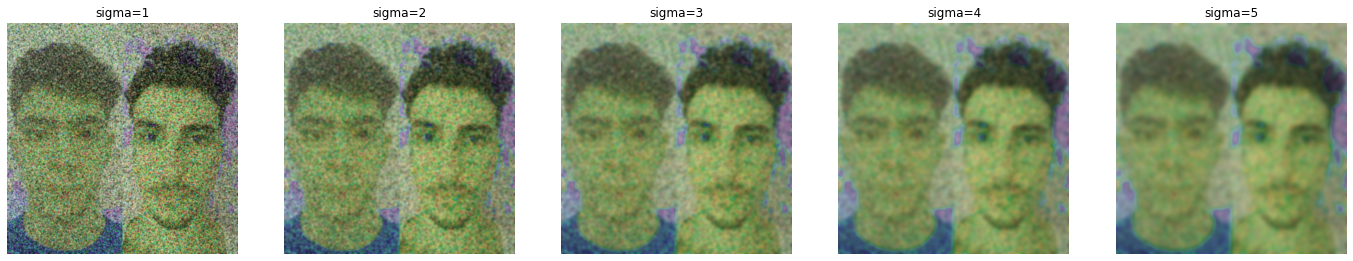

In [13]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  gaus_filteredH = filters.gaussian(saltpepper_image[:, :, 0], sigma)
  gaus_filteredS = filters.gaussian(saltpepper_image[:, :, 1], sigma)
  gaus_filteredV = filters.gaussian(saltpepper_image[:, :, 2], sigma)
  gaus_filtered_snp = np.dstack((gaus_filteredH, gaus_filteredS, gaus_filteredV))
  acc.append(gaus_filtered_snp)

imcmp_v5(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'])

Το Γκαουσιανό φίλτρο παρουσιάζει παρόμοια συμπεριφορά με το φίλτρο μέσης τιμής που μελετήσαμε παραπάνω. Ο χρωματικός χώρος των εικόνων εξόδου είναι αλλοιωμένος, με την αύξηση του `sigma` έχουμε όλο και πιο θολό αποτέλεσμα, ενώ σε καμία περίπτωση δεν έχουμε απομάκρυνση του θορύβου.

#### Median filter

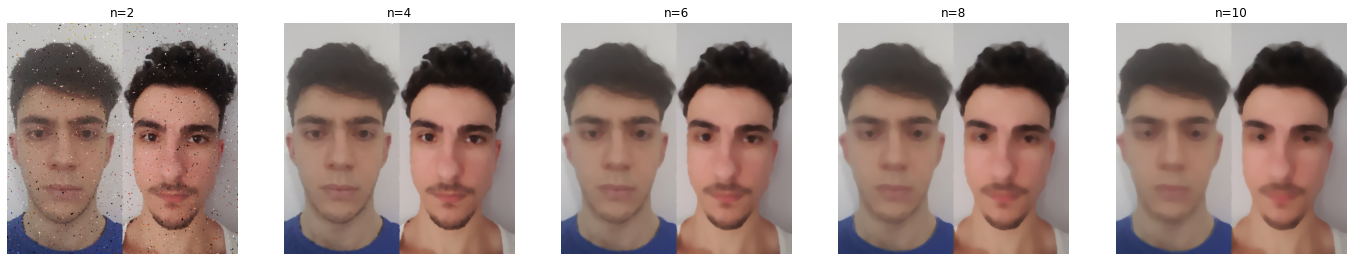

In [14]:
acc = []
for n in [2, 4, 6, 8, 10]:
  neighborhood = disk(n)
  median_filteredH = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 0]), neighborhood)
  median_filteredS = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 1]), neighborhood)
  median_filteredV = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 2]), neighborhood)
  median_filtered_snp = img_as_float(np.dstack((median_filteredH, median_filteredS, median_filteredV)))
  acc.append(median_filtered_snp)

imcmp_v5(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'])

Σε αντίθεση με τα προηγούμενα φίλτρα που εξετάσαμε, το φίλτρο μέσου όρου παράγει εξαιρετικά ικανοποιητικά αποτελέσματα. Πιο συγκεκριμένα, για δίσκο ακτίνας 4, η εικόνα εξόδου έχει αποθορυβοποιηθεί πλήρως, χωρίς να υπάρξει σημαντική πτώση της ποιότητάς της.

Λαμβάνοντας, λοιπόν, υπόψιν όλα τα παραπάνω αποτελέσματά μας, θα χρησιμοποιήσουμε το **φίλτρο μέσου όρου** για αποθορυβοποίηση της εικόνας με Salt & Pepper θόρυβο.

In [0]:
saltpepper_final = acc[1] # final salt&pepper-noise image

---

## Edge Detection

Για την ανίχνευση ακμών θα χρησιμοποιήσουμε τρία διαφορετικά φίλτρα: Laplacian, Canny και Marr-Hildreth. 

Στην περίπτωση της αποθορυβοποιημένης εικόνας Γκαουσιανού θορύβου έχουμε μόνο τη διάσταση V στη διάθεση μας. Συνεπώς η ανίχνευση ακμών θα λάβει χώρα μονάχα σε αυτό το κανάλι. Στην περίπτωση, ωστόσο, της αποθορυβοποιημένης εικόνας Salt & Pepper θορύβου, θα χρησιμοποιήσουμε και τα τρία κανάλια για να ανιχνεύσουμε ακμές.

Προς αυτοματοποίηση της διαδικασίας πειραματισμών θα υλοποιήσουμε τη συνάρτηση `cartoonification_testing`, η οποία θα επιστρέφει μία εικόνα με μαύρο φόντο, πάνω στην οποία θα επισημαίνουμε τις ακμές που ανίχνευσε ο εκάστοτε αλγόριθμος σε κάθε κανάλι που είναι διαθέσιμο στην εικόνα που δέχεται ως όρισμα. Πιο συγκεκριμένα, με κόκκινο χρώμα θα επισημαίνεται το κανάλι *Hue*, με πράσινο το κανάλι *Saturation* και με μπλε το κανάλι *Value*.

Σκοπός της συνάρτησης είναι να ελέγξουμε σε ποιό βαθμό οι ακμές που θα ανιχνευθούν είναι χρήσιμες για την εφαρμογή μας, ώστε να επιλέξουμε σε μελλοντικό χρόνο τις ακμές από τα κανάλια που θέλουμε να χρησιμοποιήσουμε.

In [0]:
from scipy import signal
from skimage import feature
from skimage.filters import laplace, sobel


def cartoonification_testing(image, method, sigma=None, ltype=1, V_only=False):
  
    """
    Summary:
    -----------
    Cartoonifies image given by replacing detected edges with black color. Input image is remained
    unchanged. Edge detection follows one of three available methods.
    
    Parameters:
    -----------
    image : numpy.ndarray, image on HSV colorspace
    method : string, edge detection method: laplacian, canny, marr-hildreth, sobel
    sigma : float, default = None, sigma value for canny method
    ltype : int, default = 1, corresponds to two types of laplacian kernel, 1 and 2
    V_only: boolean, default = False, detect edges only 

    Returns:
    -----------
    RBG-image with detected edges on dimensions H-S-V, edges detected on all dimensions available
    """

    if method == "laplacian":
      if ltype == 1:
        laplacian_kernel = [[-1,-1,-1], [-1, 8, -1], [-1,-1,-1]]
      elif ltype == 2:
        laplacian_kernel = [[0,1,0], [1, -4, 1], [0,1,0]]
      if V_only == False: # three dimensions
        edges_H = np.clip(signal.convolve2d(image[:, :, 0], laplacian_kernel, mode="same"), 0, 255)
        edges_H = np.where(edges_H > 0.0, True, False) # fetch all edges detected above threshold
        edges_S = np.clip(signal.convolve2d(image[:, :, 1], laplacian_kernel, mode="same"), 0, 255)
        edges_S = np.where(edges_S > 0.0, True, False) # fetch all edges detected above threshold
        edges_V = np.clip(signal.convolve2d(image[:, :, 2], laplacian_kernel, mode="same"), 0, 255)
        edges_V = np.where(edges_V > 0.0, True, False) # fetch all edges detected above threshold
      else: # one dimension
        edges_V = np.clip(signal.convolve2d(image, laplacian_kernel, mode="same"), 0, 255)
        edges_V = np.where(edges_V > 0.0, True, False) # fetch all edges detected above threshold

    elif method == "canny":
      if sigma is None:
        raise ValueError("Please select a sigma value.")
      if V_only == False: # three dimensions
        edges_H = feature.canny(image[:, :, 0], sigma=sigma)
        edges_S = feature.canny(image[:, :, 1], sigma=sigma)
        edges_V = feature.canny(image[:, :, 2], sigma=sigma)
      else: # one dimension
        edges_V = feature.canny(image, sigma=sigma)

    elif method == "marr-hildreth":
      if sigma is None:
        raise ValueError("Please select a sigma value.")
      if V_only == False: # three dimensions
        edges_H = np.clip(ndimage.gaussian_laplace(image[:, :, 0], sigma=sigma), 0, 255)
        edges_H = np.where(edges_H > 0, True, False) # fetch all edges detected above threshold
        edges_S = np.clip(ndimage.gaussian_laplace(image[:, :, 1], sigma=sigma), 0, 255)
        edges_S = np.where(edges_S > 0, True, False) # fetch all edges detected above threshold
        edges_V = np.clip(ndimage.gaussian_laplace(image[:, :, 2], sigma=sigma), 0, 255)
        edges_V = np.where(edges_V > 0, True, False) # fetch all edges detected above threshold
      else: # one dimension
        edges_V = np.clip(ndimage.gaussian_laplace(image, sigma=sigma), 0, 255)
        edges_V = np.where(edges_V > 0, True, False) # fetch all edges detected above threshold

    else:
      raise ValueError("Please chose ONE of the available methods: laplacian, canny, marr-hildreth.")

    res = [] # accumulator of edges on all available dimensions

    # Reflect edges detected on a black panel (H/R, S/G, V/B)
    edges = img_as_ubyte(np.zeros((512, 512))) # create black panel
    edges = np.dstack((edges, edges, edges)) # stack to RBG dimensions
    if V_only == False:
      edges[edges_H, :] = [255, 0, 0] # red
      res.append(edges_H)
      edges[edges_S, :] = [0, 255, 0] # green
      res.append(edges_S)
    edges[edges_V, :] = [0, 0, 255] # blue
    res.append(edges_V)

    return (edges, res)

### Gaussian Noise Image

#### LaPlacian

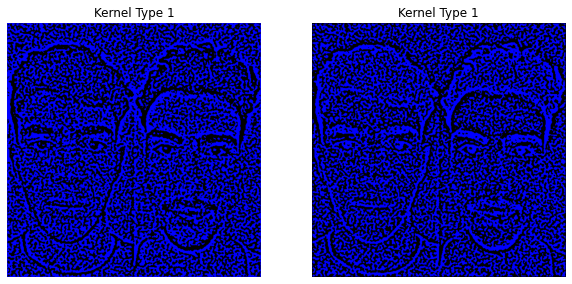

In [17]:
acc = []
for ltype in [1, 2]:
  acc.append(cartoonification_testing(gaussian_final, "laplacian", ltype=ltype, V_only=True)[0])

imcmp_v2(acc, ['Kernel Type 1', 'Kernel Type 1'], cmap='cividis')

Ο Λαπλασιανός ανιχνευτής ακμών παρατηρούμε ότι δεν εξυπηρετεί τον σκοπό μας για cartoonification. Αυτό συμβαίνει επειδή δε μπορεί να εντοπίσει βασικά χαρακτηριστικά των προσώπων, επηρεαζόμενος πιθανώς από το θόρυβο που προσθέσαμε σε προηγούμενο βήμα.

#### Canny

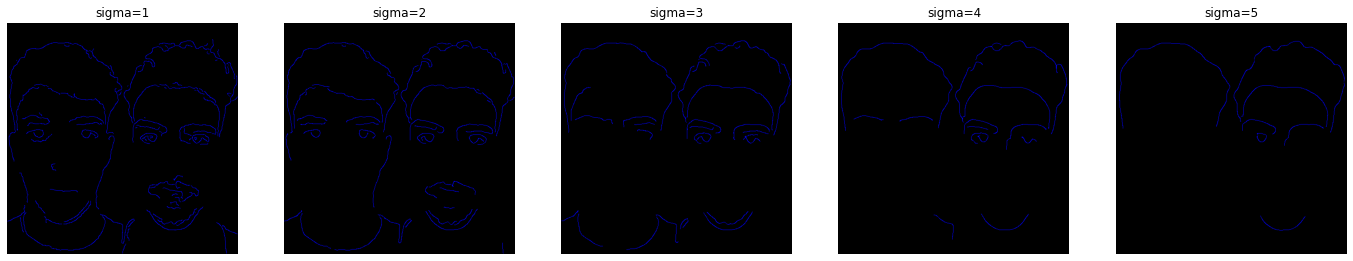

In [18]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  acc.append(cartoonification_testing(gaussian_final, "canny", sigma=sigma, V_only=True)[0])

imcmp_v5(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'], cmap='cividis')

Ο ανιχνευτής ακμών Canny, παρουσιάζει ικανοποιητικά αποτελέσματα για το σκοπό μας. Συγκεκριμένα για `sigma=1` παρατηρούμε ότι εντοπίζει τα χαρακτηριστικά των προσώπων, χωρίς να επηρεάζεται από το περιβάλλον της εικόνας.

#### Marr-Hildreth

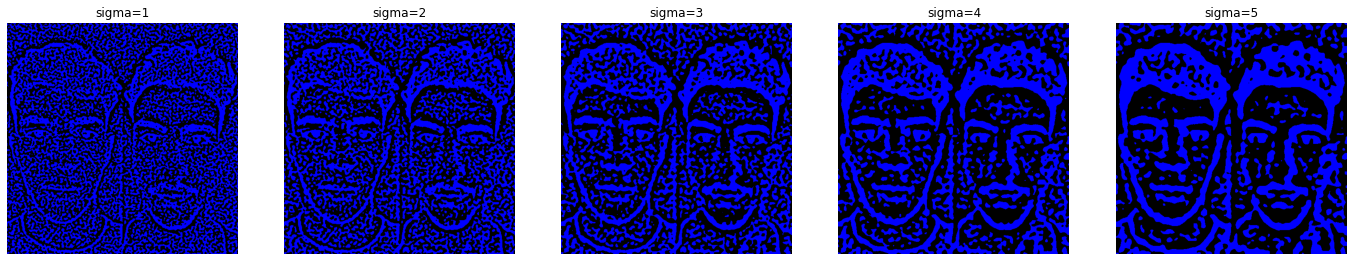

In [19]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  acc.append(cartoonification_testing(gaussian_final, "marr-hildreth", sigma=sigma, V_only=True)[0])

imcmp_v5(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'], cmap='cividis')

Η περίπτωση του ανιχνευτή Marr-Hildreth είναι εξίσου ενδιαφέρον με παραπάνω. Παρατηρούμε ότι για μεγάλες τιμές του σίγμα και συγκεκριμένα για `sigma=4,5`, παράγονται έντονες γραμμές ανίχνευσης που αντιστοιχούν σε χρήσιμα χαρακτηριστικά προσώπου. Αν και στην όλη διαδικασία συμμετέχει και το περιβάλλον της εικόνας, η ιδιαιτερότητα των έντονων ακμών φαίνεται να εξυπηρετεί το σκοπό του cartoonification.

### Salt & Pepper Noise Image

#### LaPlacian

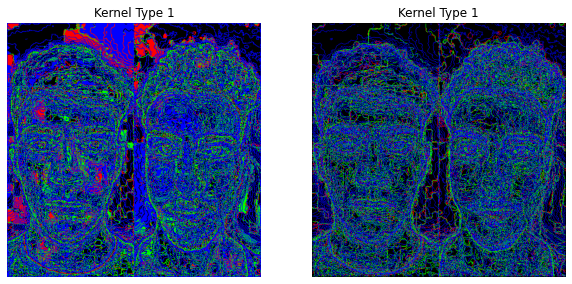

In [20]:
acc = []
for ltype in [1, 2]:
  acc.append(cartoonification_testing(saltpepper_final, "laplacian", ltype=ltype)[0])

imcmp_v2(acc, ['Kernel Type 1', 'Kernel Type 1'], cmap='cividis')

Και σε αυτήν την περίπτωση το Λαπλασιανό φίλτρο δεν παρουσιάζει την επιθυμητή συμπεριφορά για την εφαρμογή μας, καθώς αδυνατεί να εντοπίσει και να επικεντρωθεί στα χαρακτηριστικά των προσώπων.

#### Canny

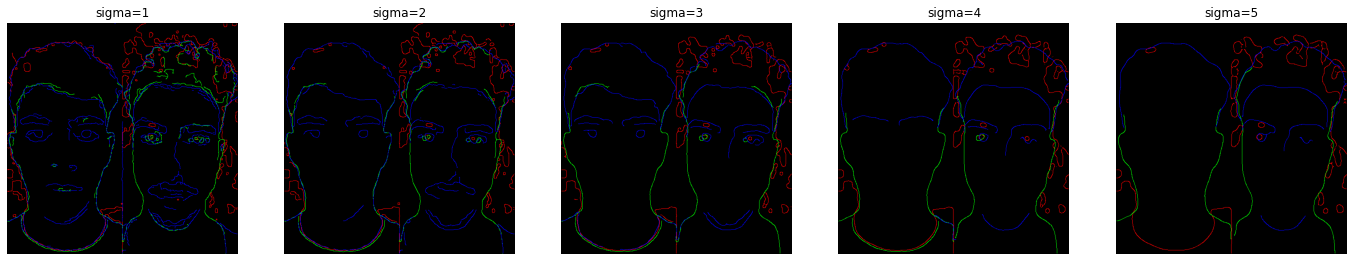

In [21]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  acc.append(cartoonification_testing(saltpepper_final, "canny", sigma=sigma)[0])

imcmp_v5(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'], cmap='cividis')

Ο ανιχνευτής Canny, παρουσιάζει σίγουρα καλύτερα αποτελέσματα με παραπάνω. Παρατηρούμε ότι οι ακμές με πράσινο και μπλε χρώμα, δηλαδή οι ακμές που ανιχνεύτηκαν στα κανάλια *Saturation* και *Value* συμβάλλουν περισσότερο στη σκιαγράφηση των προσώπων και των χαρακτηριστικών τους. 

#### Marr-Hildreth

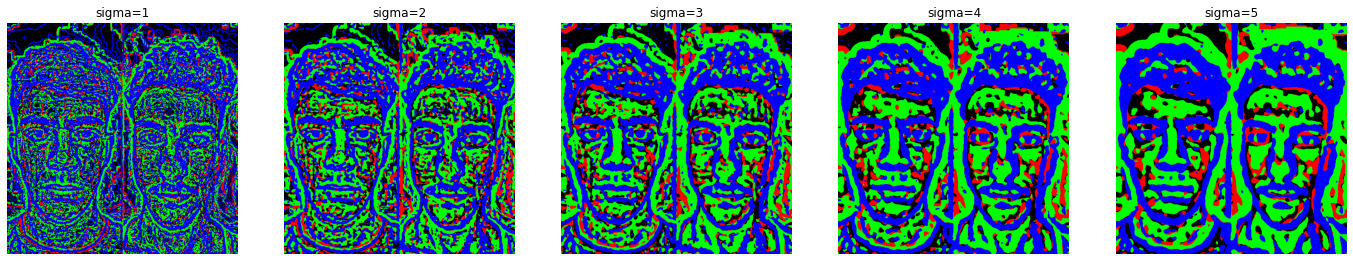

In [22]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  acc.append(cartoonification_testing(saltpepper_final, "marr-hildreth", sigma=sigma)[0])

imcmp_v5(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'], cmap='cividis')

Ο ανιχνεύτης Marr-Ηildreth φαίνεται να παρουσιάζει και εδώ τα καλύτερα αποτελέσματα που εξυπηρετούν το σκοπό μας. Παρατηρούμε ότι οι ακμές που ανιχνεύτηκαν στο κανάλι *Value*, εστιάζονται στα χαρακτηριστικά των προσώπων, ενώ με τη σταδιακή αύξηση του σίγμα, γίνονται όλο και πιο έντονες. Αυτό αποτελεί ένα χαρακτηριστικό που, όπως αναφέραμε και παραπάνω, μπορεί να φανεί χρήσιμο για το cartoonification.

---

## Cartoonification

Προτού προχωρήσουμε στην παραγωγή cartoonified εικόνων, θα επιλέξουμε τα αποδοτικότερα φίλτρα ανίχνευσης ακμών που μελετήσαμε παραπάνω.

Σχετικά με τα **Λαπλασιανά φίλτρα**, μπορούμε να καταλήξουμε ότι δεν ενδείκνυνται για τη συγκεκριμένη εφαρμογή, καθώς παρουσιάζουν μία αδυναμία στον εντοπισμό σημαντικών χαρακτηριστικών των προσώπων που θα παράξουν ένα αισθητικά όμορφο αποτέλεσμα.

Για τα **φίλτρα Canny**, θα επιλέξουμε `sigma=[1-2]`. Σημειώνουμε ότι στην περίπτωση της εικόνας με Salt & Pepper θόρυβο θα χρησιμοποιήσουμε μόνο τα κανάλια *Saturation* και *Value* για να παράξουμε την cartoonified εικόνα μας.

Τέλος, για τους **ανιχνευτές Marr-Hildreth** θα πειραματιστούμε με τιμές `sigma=[3-5]`. Όπως αναφέραμε και παραπάνω, τα συγκεκριμένα φίλτρα παράγουν έντονες ακμές για τα χαρακτηριστικά των προσώπων, στοιχείο το οποίο μπορεί να συμβάλλει σε ένα αισθητικά καλύτερο αποτέλεσμα cartoonification. Σημειώνουμε και σε αυτήν την περίπτωση, ότι για την εικόνα με Salt & Pepper θόρυβο θα χρησιμοποιήσουμε μόνο τις ακμές που ανιχνεύθηκαν στο κανάλι *Value*.

Λαμβάνοντας υπόψιν τα παραπάνω, η συνάρτηση `cartoonify` που θα υλοποιήσουμε θα περιέχει ακόμα ένα όρισμα που υποδεικνύει ποια κανάλια θα χρησιμοποιηθούν για την παραγωγή της cartoonified εικόνας.

In [0]:
def cartoonify(image, edges, S_dim=False):

    cartoon = np.copy(image) # create image copy
    if S_dim: # detection on HSV image
      cartoon[edges[1], :] = [0, 0, 0] # paint black edges found on S-dimension
      cartoon[edges[2], :] = [0, 0, 0] # paint black edges found on V-dimension
    else:
      if len(edges) == 1: # detection on GRAYSCALE image
        cartoon[edges[0], :] = [0, 0, 0] # paint black edges found on V-dimension
      else: # detection on HSV image
        cartoon[edges[2], :] = [0, 0, 0] # paint black edges found on V-dimension

    return cartoon

### Gaussian Noise Image

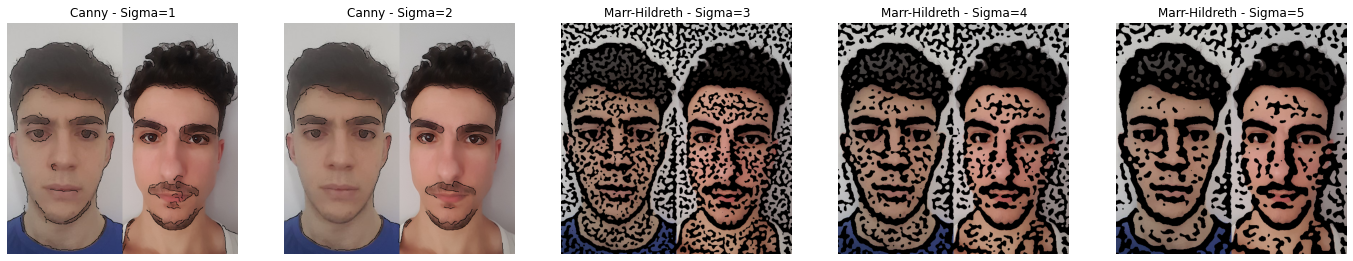

In [24]:
(_, edges1) = cartoonification_testing(gaussian_final, "canny", sigma=1, V_only=True)
(_, edges2) = cartoonification_testing(gaussian_final, "canny", sigma=2, V_only=True)
(_, edges3) = cartoonification_testing(gaussian_final, "marr-hildreth", sigma=3, V_only=True)
(_, edges4) = cartoonification_testing(gaussian_final, "marr-hildreth", sigma=4, V_only=True)
(_, edges5) = cartoonification_testing(gaussian_final, "marr-hildreth", sigma=5, V_only=True)

imcmp_v5([cartoonify(final_image, edges1), cartoonify(final_image, edges2), 
          cartoonify(final_image, edges3), cartoonify(final_image, edges4), cartoonify(final_image, edges5)], 
          ["Canny - Sigma=1", "Canny - Sigma=2", "Marr-Hildreth - Sigma=3", "Marr-Hildreth - Sigma=4", "Marr-Hildreth - Sigma=5"], cmap='cividis')

### Salt & Pepper Noise Image

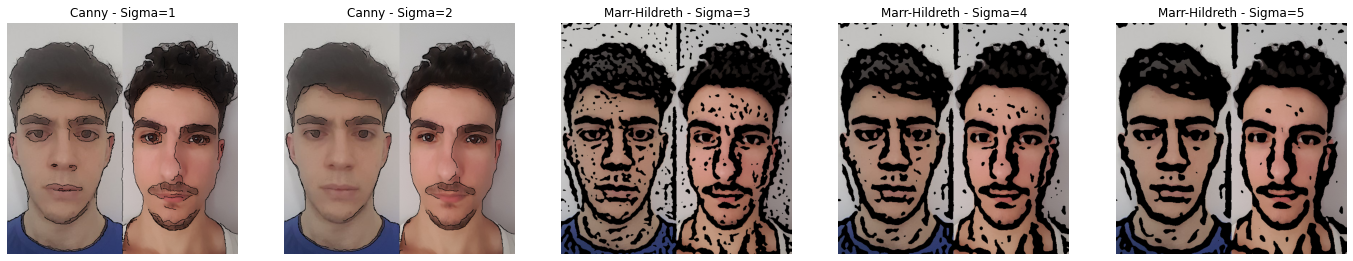

In [25]:
(_, edges1) = cartoonification_testing(saltpepper_final, "canny", sigma=1)
(_, edges2) = cartoonification_testing(saltpepper_final, "canny", sigma=2)
(_, edges3) = cartoonification_testing(saltpepper_final, "marr-hildreth", sigma=3)
(_, edges4) = cartoonification_testing(saltpepper_final, "marr-hildreth", sigma=4)
(_, edges5) = cartoonification_testing(saltpepper_final, "marr-hildreth", sigma=5)

imcmp_v5([cartoonify(final_image, edges1, S_dim=True), cartoonify(final_image, edges2, S_dim=True), 
          cartoonify(final_image, edges3), cartoonify(final_image, edges4), cartoonify(final_image, edges5)], 
          ["Canny - Sigma=1", "Canny - Sigma=2", "Marr-Hildreth - Sigma=3", "Marr-Hildreth - Sigma=4", "Marr-Hildreth - Sigma=5"], cmap='cividis')

---

## Συμπεράσματα

Συγκρίνοντας τους παραπάνω πειραματισμούς μας, καταλήγουμε ότι η ανίχνευση ακμών με **φίλτρο Marr-Hildreth** παράγει τα καλύτερα αποτελέσματα για την εφαρμογή μας. Αξίζει ωστόσο να σημειώσουμε ότι αυτό δε σημαίνει ότι τα υπόλοιπα φίλτρα είναι αναποτελεσματικά στην ανίχνευση ακμών, καθώς μπορούν να βρουν εφαρμογή σε διαδικασία με διαφορετικούς στόχους και προτεραιότητες.

Η εικόνα στην οποία καταλήγουμε είναι εκείνη που προκύπτει από την ανίχνευση ακμών **Marr-Hildreth** σε αποθορυβοποιημένη εικόνα **Salt & Pepper** θορύβου για `sigma=5`. Το αποτέλεσμα που λαμβάνουμε σκιαγραφεί με αισθητικά όμορφο τρόπο τα χαρακτηριστικά των προσώπων, ενώ παράλληλα προσφέρει μία αίσθηση comic.

Τέλος, παρουσιάζουμε την αρχική μας εικόνα σε αντιδιαστολή με το cartoonification αποτέλεσμα που καταφέραμε να πετύχουμε.

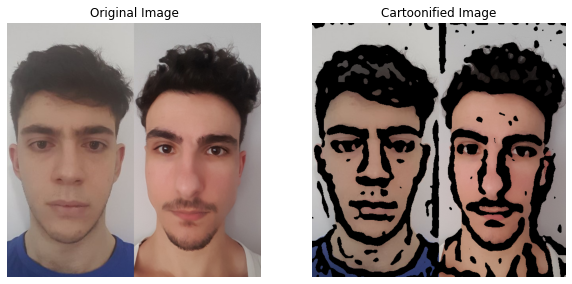

In [26]:
imcmp_v2([final_image, cartoonify(final_image, edges5)], ["Original Image", "Cartoonified Image"], cmap='cividis')